# Metropolitan bicycle sharing system:  How many bicycles need to be ready at a given time
## Regression Approach
Data was taken from https://www.kaggle.com/c/bike-sharing-demand/data in April 2020.       
Plots can be found in the notebook 'bikeSharing_visualPart'

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_preprocessed.csv', index_col=None, parse_dates=True)
df.head()

,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,...,year,summer,fall,winter,Monday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,0,1,9.84,81,0.0,3,13,16,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,9.02,80,0.0,8,32,40,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.02,80,0.0,5,27,32,2,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,9.84,75,0.0,3,10,13,3,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.84,75,0.0,0,1,1,4,...,0,0,0,0,0,0,0,0,1,0


#### Data Assignment and Scaling

In [3]:
Xy = df[['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
        'count', 'hour', 'month', 'year', 'summer', 'fall', 'winter', 'Monday', 
        'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
y = Xy['count']
X = Xy.drop(['count'], axis=1)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
df[['temp', 'humidity', 'windspeed', 'hour', 'month', 'year']] = scaler.fit_transform(df[['temp', 'humidity', 'windspeed', 'hour', 'month', 'year']])
df.tail()

,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,...,year,summer,fall,winter,Monday,Wednesday,Thursday,Friday,Saturday,Sunday
10881,0,1,1,0.367347,0.50,0.456213,7,329,336,0.826087,...,1.0,0,0,1,0,1,0,0,0,0
10882,0,1,1,0.346939,0.57,0.263195,10,231,241,0.869565,...,1.0,0,0,1,0,1,0,0,0,0
10883,0,1,1,0.326531,0.61,0.263195,4,164,168,0.913043,...,1.0,0,0,1,0,1,0,0,0,0
10884,0,1,1,0.326531,0.61,0.105325,12,117,129,0.956522,...,1.0,0,0,1,0,1,0,0,0,0
10885,0,1,1,0.306122,0.66,0.157870,4,84,88,1.000000,...,1.0,0,0,1,0,1,0,0,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45883)

## Machine Learning: Try different regression models
#### Random Forest Regressor

In [6]:
rf = RandomForestRegressor(random_state=42378, n_jobs=-1)
param_grid_rf = {'n_estimators' : [20,50,80,120,150,200,250,300,350,400],
                'max_depth': [5,7,9,11,13,15],
                'bootstrap': [True, False]}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=13)
grid_result_rf = grid_rf.fit(X_train, y_train)
print("best score: " +  str(grid_rf.best_score_))
print(grid_rf.best_params_)

best score: 0.9483045163641625
{'bootstrap': True, 'max_depth': 15, 'n_estimators': 400}


You could plot *score* vs *parameter settings*. Exemplarily shown for *n_estimators* for RandomForestRegressor:

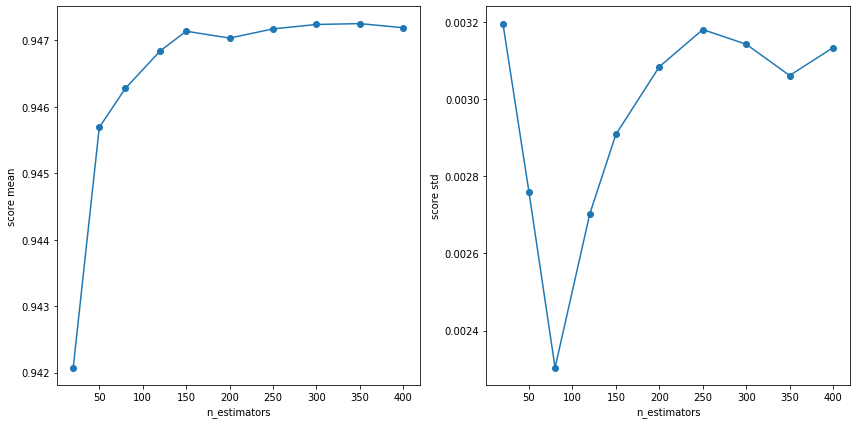

In [7]:
rf_nEstimators = RandomForestRegressor(random_state=42378, n_jobs=-1)
param_grid_rf_nEstimators = {'n_estimators' : [20,50,80,120,150,200,250,300,350,400]}
grid_rf_nEstimators = GridSearchCV(estimator=rf_nEstimators, param_grid=param_grid_rf_nEstimators)
grid_result_rf_nEstimators = grid_rf_nEstimators.fit(X_train, y_train)

def plot_parameters(params, bestreg, parameter):
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.plot(params[parameter],bestreg.cv_results_['mean_test_score'],'o-')
    plt.xlabel(parameter)
    plt.ylabel('score mean')
    plt.subplot(122)
    plt.plot(params[parameter],bestreg.cv_results_['std_test_score'],'o-')
    plt.xlabel(parameter)
    plt.ylabel('score std')
    plt.tight_layout()
    plt.show()    

params={'n_estimators':[20,50,80,120,150,200,250,300,350,400]}
bestreg=grid_rf_nEstimators
plot_parameters(params, bestreg, 'n_estimators')

#### AdaBoost Regressor

In [8]:
adr = AdaBoostRegressor(random_state=0)
param_grid_adr = {'base_estimator': [RandomForestRegressor(random_state=42378, n_jobs=-1)],
                  'n_estimators': [3,5,7,9,15,20,50,75,100],
                  'learning_rate': [0.1, 1, 2, 5]}
grid_adr = GridSearchCV(estimator=adr, param_grid=param_grid_adr, cv=5)
grid_result_adr = grid_adr.fit(X_train, y_train)
print("best score: " + str(grid_adr.best_score_))
print(grid_adr.best_params_)

best score: 0.952878749213086
{'base_estimator': RandomForestRegressor(n_jobs=-1, random_state=42378), 'learning_rate': 1, 'n_estimators': 50}


#### Gradient Boosting Regressor

In [9]:
gbr = GradientBoostingRegressor(random_state=33)
param_grid_gbr = {'n_estimators': [3,5,7,9,15,20,50,75,100],
                  'max_depth': [5,7,9,11,13,15],
                  'learning_rate': [0.1, 1, 2]}
grid_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=13)
grid_result_gbr = grid_gbr.fit(X_train, y_train)
print("best score: " +  str(grid_gbr.best_score_))
print(grid_gbr.best_params_)

best score: 0.9553603494253722
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


#### Support Vector Regressor

In [10]:
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10, 100],
                  'degree': range(3,7),
                  'gamma': ['scale','auto']}
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5)
grid_result_svr = grid_svr.fit(X_train, y_train)
print("best score: " + str(grid_svr.best_score_))
print(grid_svr.best_params_)

best score: 0.5865156592645706
{'C': 100, 'degree': 3, 'gamma': 'auto'}


### Cross Validation

In [11]:
def cross_val(model, m, X_train, y_train):
    cvValue_mean = []
    for i in range(5,15):       
        cross_val_L = cross_val_score(m, X_train, y_train, cv=i) 
        cvValue_mean.append([i,cross_val_L.mean()])
    df_cvValue_mean = pd.DataFrame(cvValue_mean)
    df_cvValue_mean.rename(columns={0:'cv_set_value', 1:'cv_res_mean'}, inplace = True)
    df_cvValue_mean.set_index(['cv_set_value'], inplace=True)
    print(df_cvValue_mean['cv_res_mean'].sort_values(ascending=False), '\n\n')

### Model Assignment

In [14]:
reg_models = [RandomForestRegressor(random_state=42378, n_jobs=-1, n_estimators=350, max_depth=15, bootstrap=True),
              AdaBoostRegressor(random_state=0, base_estimator=RandomForestRegressor(n_jobs=-1, random_state=42378), n_estimators=50, learning_rate=1),
              GradientBoostingRegressor(random_state=33, learning_rate=0.1, n_estimators=100, max_depth=9), 
              SVR(C=100, degree=3, gamma='auto')]
model_names = ['RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','SVR']
dict_m = {}

### Fit and Predict

In [15]:
def fit_predict(bestModel, dict_yPred, modelName):
    m = bestModel
    m.fit(X_train, y_train)
    print(bestModel)
    print('Score(X_train, y_train): ', m.score(X_train, y_train))
    y_pred = m.predict(X_test)    
    y_pred[y_pred < 0] = 0         
    dict_yPred[modelName] = y_pred
    print('Score(X_test, y_test): ', m.score(X_test, y_test))   
    print('RMSLE: ', np.sqrt(mean_squared_log_error(y_test, y_pred)))
    cross_val(bestModel, m, X_train, y_train)
    
dict_y_pred={}
for i, elem in enumerate(reg_models,1):
    dict_m[model_names[i-1]] = fit_predict(elem, dict_y_pred, model_names[i-1])

RandomForestRegressor(max_depth=15, n_estimators=350, n_jobs=-1,
                      random_state=42378)
Score(X_train, y_train):  0.9894775857478668
Score(X_test, y_test):  0.945817856941645
RMSLE:  0.31831134342645606
cv_set_value
13    0.948250
10    0.948012
9     0.947993
14    0.947910
11    0.947680
8     0.947594
7     0.947459
12    0.947274
6     0.946883
5     0.946472
Name: cv_res_mean, dtype: float64 


AdaBoostRegressor(base_estimator=RandomForestRegressor(n_jobs=-1,
                                                       random_state=42378),
                  learning_rate=1, random_state=0)
Score(X_train, y_train):  0.9982137456288263
Score(X_test, y_test):  0.9477168545416235
RMSLE:  0.407426882673246
cv_set_value
13    0.956059
14    0.955646
9     0.955227
11    0.955040
10    0.954977
8     0.954954
12    0.954816
7     0.954057
6     0.953798
5     0.952879
Name: cv_res_mean, dtype: float64 


GradientBoostingRegressor(max_depth=9, random_state=33)
Score(X_train, 

In [16]:
rmsle=[]   
for reg in reg_models:    
    reg.fit(X_train,y_train)
    y_pred=abs(reg.predict(X_test))    
    y_pred[y_pred < 0] = 0 
    if len(np.array(y_pred)[np.array(y_pred)< 0]) > 0 :
        print(reg)
        print('count of negative values: ', len(np.array(y_pred)[np.array(y_pred)< 0]),'\n')    
    rmsle.append(np.sqrt(mean_squared_log_error(y_pred,y_test)))            
dict_rmsle={'Regression_Model':model_names,'RMSLE':rmsle}   
dict_rmsle
df_rmsle=pd.DataFrame(dict_rmsle)
df_rmsle

,Regression_Model,RMSLE
0,RandomForestRegressor,0.318311
1,AdaBoostRegressor,0.407427
2,GradientBoostingRegressor,0.314924
3,SVR,0.754808


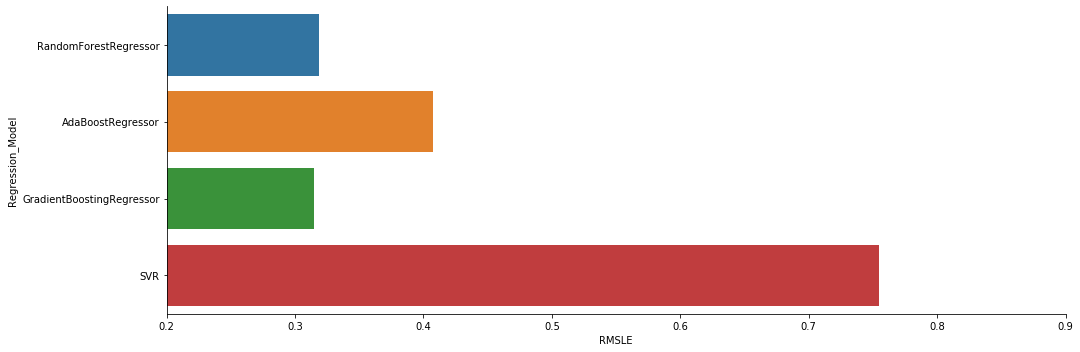

In [17]:
fig = sns.catplot(y='Regression_Model', x='RMSLE', data=df_rmsle,
                  kind='bar',height=5,aspect=3)
fig.set(xlim=(0.2, 0.9))